<a href="https://colab.research.google.com/github/pedrotorres08/LV-microgrid-SEGAN/blob/main/SEGAN_paper2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import geopandas as gpd
import gc
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [3]:
base_folder = r'/content/drive/MyDrive/ARTIGO_SEGAN'

interruption_file = r'{}/DATASETS/interruption_data_ref.parquet'.format(base_folder)
utility_data_file = r'{}/DATASETS/utility_data.gdb'.format(base_folder)
utility_reponse_emergency_file = r'{}/DATASETS/utility_response_to_emergency_data.parquet'.format(base_folder)
folderE_kWh = r'{}/DATASETS/E_kWh'.format(base_folder)

In [4]:
dfinter = pd.read_parquet(interruption_file)
ATENDIMENTO = pd.read_parquet(utility_reponse_emergency_file)
UCBT = gpd.read_file(utility_data_file, layer='UCBT')
SSDMT = gpd.read_file(utility_data_file, layer='SSDMT')
SSDBT = gpd.read_file(utility_data_file, layer='SSDBT')
UNTRMT = gpd.read_file(utility_data_file, layer='UNTRMT')
UNSEMT = gpd.read_file(utility_data_file, layer='UNSEMT')
UNSEBT = gpd.read_file(utility_data_file, layer='UNSEBT')
RAMLIG = gpd.read_file(utility_data_file, layer='RAMLIG')
CRVCRG = gpd.read_file(utility_data_file, layer='CRVCRG')
CTMT = gpd.read_file(utility_data_file, layer='CTMT')
gc.collect()

0

In [5]:
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 14})

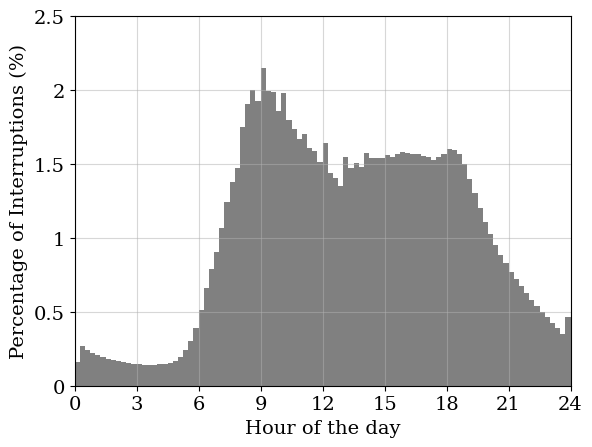

0

In [6]:
#plt.rcParams.update({'font.size': 14})
ax = dfinter['TimeOfDay'].hist(bins=96, alpha=1.0, density = True,cumulative = False, color='grey')
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Percentage of Interruptions (%)")
#ax.set_xlabel("Hora do dia")
#ax.set_ylabel("Percentual de Interrupções (%)")

scale_x = 1/15*60
scale_y = 1e-2
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_ticks(range(0,97,12))
ax.xaxis.set_major_formatter(ticks_x)

ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

ax.set_xlim([0, 96])
ax.set_ylim([0, 0.025])
plt.grid(which='both',alpha=0.5)
plt.savefig('{}/FIGURES/Fig2a.svg'.format(base_folder),bbox_inches='tight')
plt.show()

del ax,scale_x,scale_y,ticks_x,ticks_y

gc.collect()

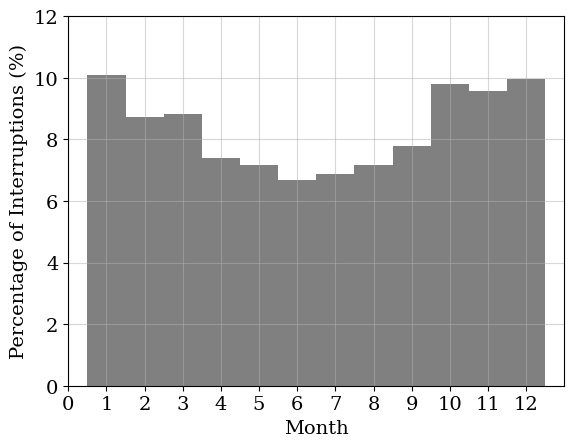

8965

In [7]:
ax = dfinter['Month'].hist(bins=[x+0.5 for x in range(0,13)], alpha=1.0, density = True,cumulative = False, color='grey')
ax.set_xlabel("Month")
ax.set_ylabel("Percentage of Interruptions (%)")
#ax.set_xlabel("Mês")
#ax.set_ylabel("Percentual de Interrupções (%)")

scale_x = 1
scale_y = 1e-2
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_ticks(range(0,13))
ax.xaxis.set_major_formatter(ticks_x)

ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

ax.set_xlim([0, 13])
ax.set_ylim([0, 0.12])
plt.grid(which='both',alpha=0.5)
plt.savefig('{}/FIGURES/Fig2b.svg'.format(base_folder),bbox_inches='tight')
plt.show()
del ax,scale_x,scale_y,ticks_x,ticks_y
gc.collect()

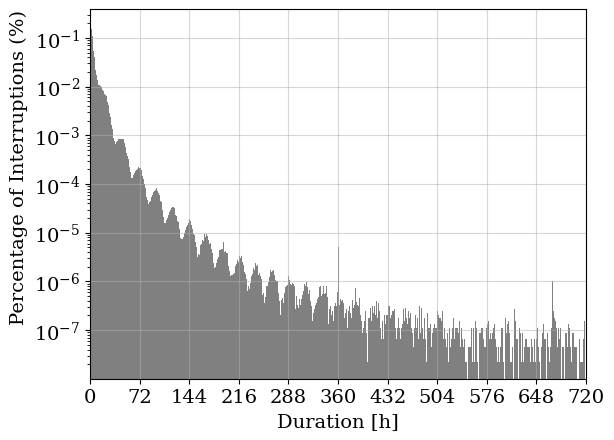

10928

In [8]:
ax = dfinter['d'].hist(bins=[x for x in range(0,720)],log=True,density=True,cumulative=False,color='grey')
ax.set_xlabel("Duration [h]")
ax.set_ylabel("Percentage of Interruptions (%)", loc='top')
#ax.set_xlabel("Duração [h]")
#ax.set_ylabel("Percentual de Interrupções (%)", loc='top')
ax.set_xlim([0, 720])
ax.xaxis.set_ticks(range(0,721,72))
plt.grid(which='major',alpha=0.5)
plt.savefig('{}/FIGURES/Fig2c.svg'.format(base_folder),bbox_inches='tight')
plt.show()
del ax
gc.collect()

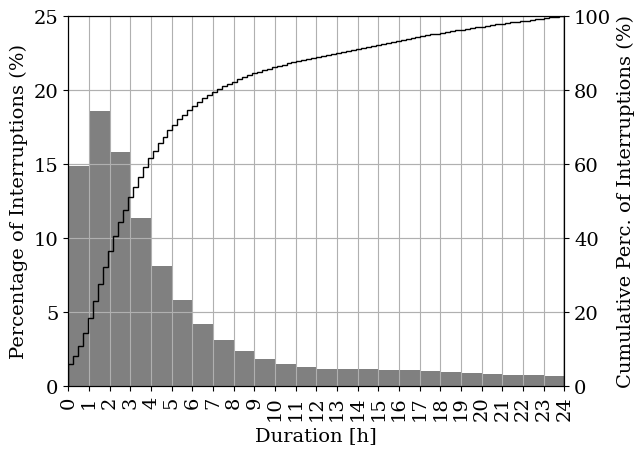

54657

In [9]:
#Nao estao sendo consideradas interrupções com menos de 3 minutos
#ax = dfinter['DurInterrupcao'].hist(bins=[x*0.0625 for x in range(1,400)],log=False,density=True,cumulative=False,color='grey')
ax = dfinter[dfinter['d'] <=24]['d'].hist(bins=24,log=False,density=True,cumulative=False,color='grey')

ax.set_xlabel("Duration [h]")
#ax.set_xlabel("Duração [h]")

ax2 = dfinter[dfinter['d'] <=24]['d'].plot(kind='hist',secondary_y=True,bins=100,log=False,density=True,cumulative=True,histtype='step',color='black')
ax2.set_ylabel("Cumulative Perc. of Interruptions (%)")
ax.set_ylabel("Percentage of Interruptions (%)")
#ax2.set_ylabel("Perc. Cumulativo de Interrupções (%)", loc='top')
#ax.set_ylabel("Percentual de Interrupções (%)")

scale_x = 1
scale_y = 1e-2
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_ticks(range(0,25,1))
ax.xaxis.set_major_formatter(ticks_x)

ax2.xaxis.set_ticks(range(0,25,1))
ax2.xaxis.set_major_formatter(ticks_x)

ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax2.yaxis.set_major_formatter(ticks_y)
ax.set_xlim([0, 24])
ax.set_ylim([0, 0.25])
ax2.set_xlim([0, 24])
ax2.set_ylim([0, 1.0])
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel("Duration [h]")
plt.grid(which='both',alpha=0.5,zorder=1)
plt.savefig('{}/FIGURES/Fig2d.svg'.format(base_folder),bbox_inches='tight')
plt.show()
del ax,scale_x,scale_y,ticks_x,ticks_y
gc.collect()

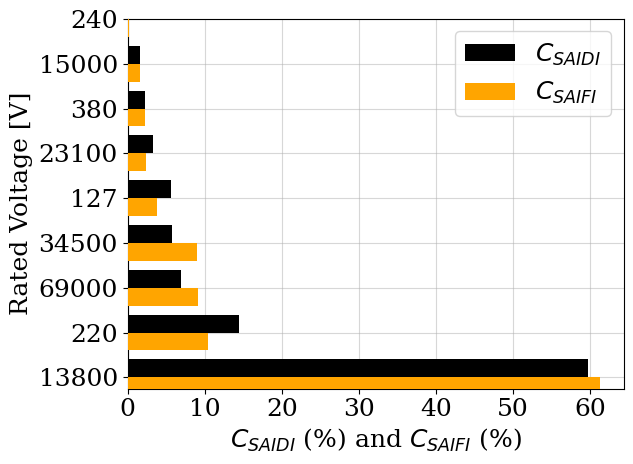

4991

In [10]:
plt.rcParams.update({'font.size': 18})

dataDEC = dfinter.groupby('VoltageLevel')['C_SAIDI'].count()*dfinter.groupby('VoltageLevel')['C_SAIDI'].mean()
dataFEC = dfinter.groupby('VoltageLevel')['C_SAIFI'].count()*dfinter.groupby('VoltageLevel')['C_SAIFI'].mean()

ax = dataDEC.divide(dataDEC.sum()).multiply(100).sort_values().iloc[::-1].plot.barh(width = 0.4,align ='edge', color='black',zorder=4)
dataFEC.divide(dataFEC.sum()).multiply(100).sort_values().iloc[::-1].plot.barh(ax=ax,color = 'orange', width= -0.4,align ='edge',zorder=4)
ax.legend(labels=['$C_{SAIDI}$', '$C_{SAIFI}$'])
ax.set_xlabel("$C_{SAIDI}$"+" (%)"+" and "+"$C_{SAIFI}$"+" (%)", loc='center')
ax.set_ylabel("Rated Voltage [V]")
ax.xaxis.set_ticks(range(0,61,10))
ax.grid(visible=True,zorder=1)
plt.grid(which='both',alpha=0.5,zorder=1)
plt.savefig('{}/FIGURES/Fig3a.svg'.format(base_folder),bbox_inches='tight')
plt.show()
gc.collect()

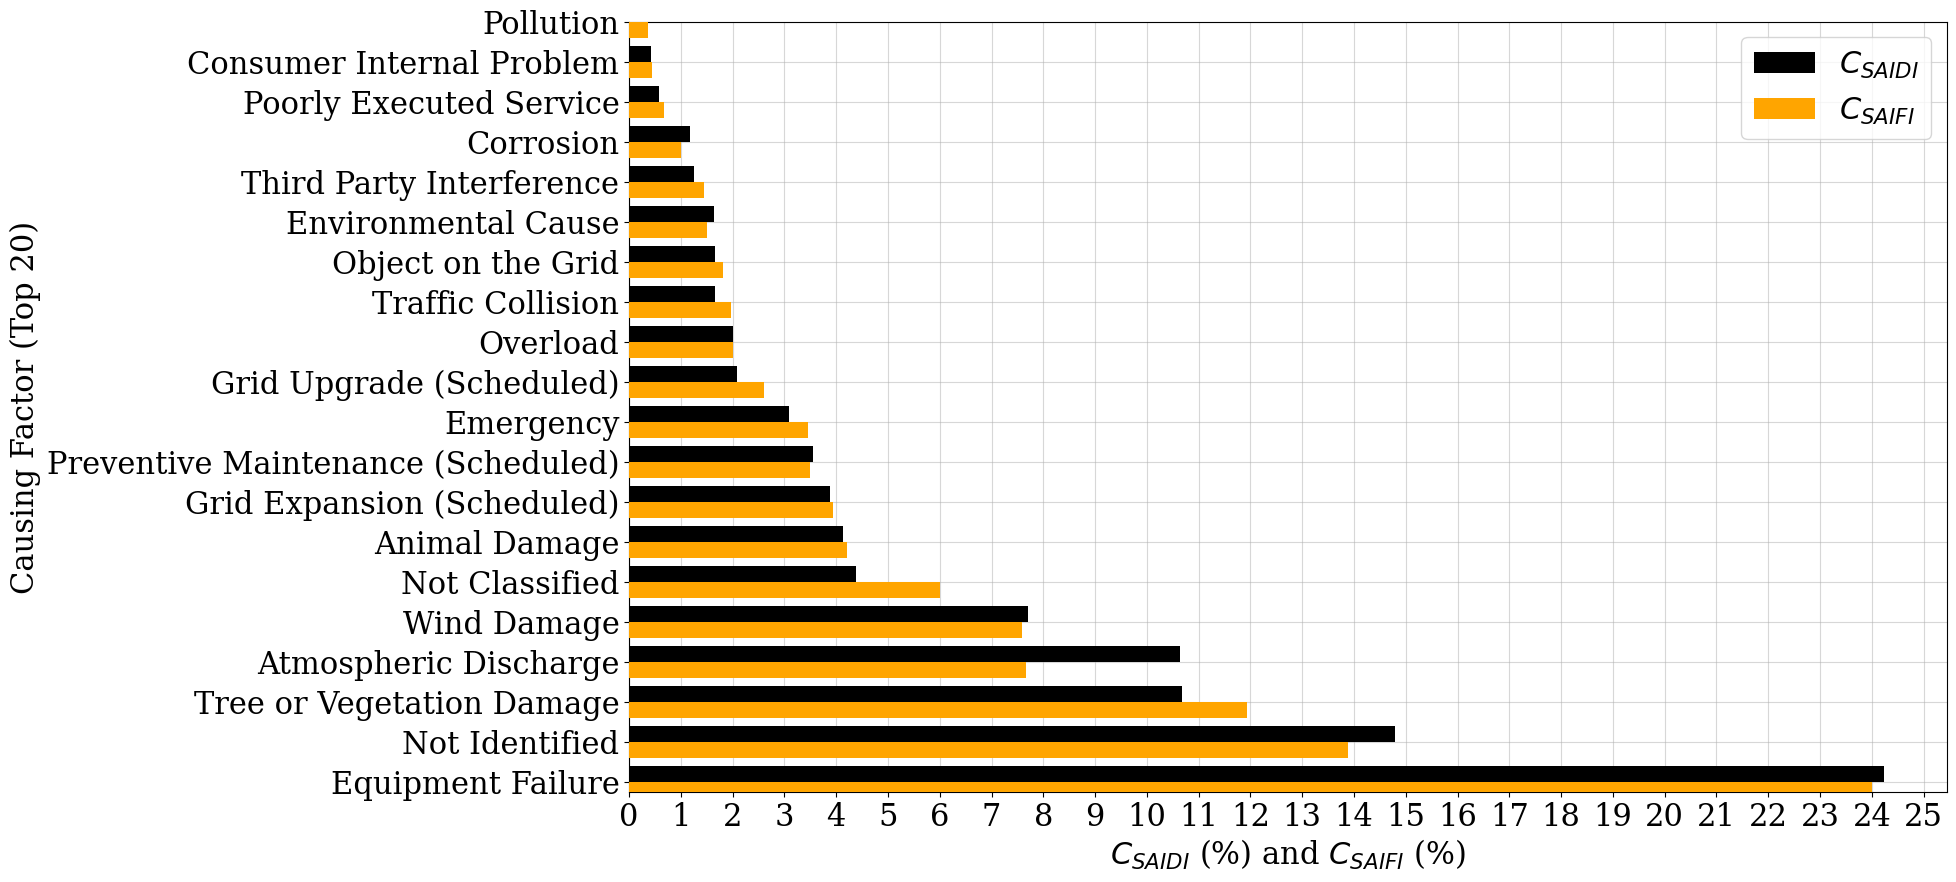

In [11]:
plt.rcParams.update({'font.size': 22})
dfinter_f = dfinter.loc[dfinter['CausingFactor'].isin(list(dict(dfinter['CausingFactor'].value_counts().head(20)).keys()))]
dataDEC = dfinter_f.groupby('CausingFactor')['C_SAIDI'].count()*dfinter_f.groupby('CausingFactor')['C_SAIDI'].mean()
dataFEC = dfinter_f.groupby('CausingFactor')['C_SAIFI'].count()*dfinter_f.groupby('CausingFactor')['C_SAIFI'].mean()

plt.figure(figsize=(17, 10))

ax = dataDEC.divide(dataDEC.sum()).multiply(100).sort_values().iloc[::-1].plot.barh(width = 0.4,align ='edge', color='black',zorder=4)
dataFEC.divide(dataFEC.sum()).multiply(100).sort_values().iloc[::-1].plot.barh(ax=ax,color = 'orange', width= -0.4,align ='edge',zorder=4)
ax.legend(labels=['$C_{SAIDI}$', '$C_{SAIFI}$'])
ax.set_xlabel("$C_{SAIDI}$"+" (%)"+" and "+"$C_{SAIFI}$"+" (%)", loc='center')
ax.set_ylabel("Causing Factor (Top 20)")
ax.xaxis.set_ticks(range(0,26,1))
ax.grid(visible=True,zorder=1)
plt.grid(which='both',alpha=0.5,zorder=1)
plt.savefig('{}/FIGURES/Fig3b.svg'.format(base_folder),bbox_inches='tight')
plt.show()

In [12]:
#Tratamento inicial - Considerando apenas trafos de ate 300 kVA - de acordo com NT Equatorial
UNTRMT = UNTRMT[UNTRMT['POT_NOM'] <= 300]
UCBT = UCBT[UCBT['UNI_TR_MT'].isin(list(UNTRMT['COD_ID']))]
UCBT = UCBT.drop(UCBT[UCBT['TIP_CC'] == ' '].index)
SSDBT = SSDBT[SSDBT['UNI_TR_MT'].isin(list(UNTRMT['COD_ID']))]

In [13]:
TMD = ATENDIMENTO[(ATENDIMENTO['SigIndicador'] == 'TMD') & (ATENDIMENTO['AnoIndice'].isin(['2018','2019','2020','2021','2022','2023']))].groupby('IdeConjUndConsumidoras').mean(numeric_only=True)['VlrIndiceEnviado']
TMP = ATENDIMENTO[(ATENDIMENTO['SigIndicador'] == 'TMP') & (ATENDIMENTO['AnoIndice'].isin(['2018','2019','2020','2021','2022','2023']))].groupby('IdeConjUndConsumidoras').mean(numeric_only=True)['VlrIndiceEnviado']
TME = ATENDIMENTO[(ATENDIMENTO['SigIndicador'] == 'TME') & (ATENDIMENTO['AnoIndice'].isin(['2018','2019','2020','2021','2022','2023']))].groupby('IdeConjUndConsumidoras').mean(numeric_only=True)['VlrIndiceEnviado']

In [15]:
def ler_cc_trafo(trafo):
  ndu = 22
  nsa = 4
  ndo = 4

  dfUC = UCBT[UCBT['UNI_TR_MT'] == trafo]

  df_add = pd.DataFrame()
  df_add.insert(0, 'dia', ['DU','SA','DO'])
  df_add = df_add.set_index('dia')

  for uc in range(len(dfUC)):
    CodCrvCrg = dfUC['TIP_CC'].iloc[uc]

    edu = np.array(CRVCRG[(CRVCRG['COD_ID'] == CodCrvCrg) & (CRVCRG['TIP_DIA'] == 'DU')]['E_DIA'])
    esa = np.array(CRVCRG[(CRVCRG['COD_ID'] == CodCrvCrg) & (CRVCRG['TIP_DIA'] == 'SA')]['E_DIA'])
    edo = np.array(CRVCRG[(CRVCRG['COD_ID'] == CodCrvCrg) & (CRVCRG['TIP_DIA'] == 'DO')]['E_DIA'])

    kWhmes = dfUC[UNTRMT['M_MAX'].loc[trafo]].iloc[uc]

    v1 = ndu*edu[0]
    v2 = nsa*esa[0]
    v3 = ndo*edo[0]
    coef = kWhmes/(v1+v2+v3)

    cc_du = coef*CRVCRG[(CRVCRG['COD_ID'] == CodCrvCrg) & (CRVCRG['TIP_DIA'] == 'DU')][['POT_{:02d}'.format(x) for x in range(1,97)]].set_axis(['DU'])#.reset_index(drop=True)
    cc_sa = coef*CRVCRG[(CRVCRG['COD_ID'] == CodCrvCrg) & (CRVCRG['TIP_DIA'] == 'SA')][['POT_{:02d}'.format(x) for x in range(1,97)]].set_axis(['SA'])#.reset_index(drop=True)
    cc_do = coef*CRVCRG[(CRVCRG['COD_ID'] == CodCrvCrg) & (CRVCRG['TIP_DIA'] == 'DO')][['POT_{:02d}'.format(x) for x in range(1,97)]].set_axis(['DO'])#.reset_index(drop=True)

    df_add = df_add.add(pd.concat([cc_du, cc_sa, cc_do], axis=0),fill_value=0)

  return df_add.T

def size_MFR(L,Dref,dt,pbase):
  #Calculate the MA of the load profiles @ interval u
  u = int(Dref/dt)
  len_L = len(L)

  L = pd.concat([L, L.iloc[0:u-1]], ignore_index=True)
  L['MA'] = L['DU'].rolling(window=u).mean()

  L.iloc[0:u-1] = L.iloc[-u+1:]
  L = L.iloc[0:len_L]

  P_mfr = max(L['DU'])*pbase
  E_mfr = max(L['MA'])*Dref*pbase
  return P_mfr,E_mfr,L

In [16]:
#Algoritmo para determinar a curva de carga de cada rede de BT no mes de maior consumo.
#1 - Com base no consumo de energia de cada UC, determinar o mes de maior consumo da rede de BT
##### PROCESSAMENTO JA SALVO NO .PARQUET!!!!! ##############
UNTRMT = UNTRMT.set_index('COD_ID')
UNTRMT['M_MAX'] = UCBT.groupby('UNI_TR_MT').sum()[['ENE_{:02d}'.format(x) for x in range(1,13)]].idxmax(axis=1)
UNTRMT['M_MAX_INT'] = UNTRMT['M_MAX'].apply(lambda x: int(x[-2:]) if not(pd.isnull(x)) else x)
UNTRMT = UNTRMT.dropna()

#2 - Calcular a energia equivalente diaria de cada tipo de curva de carga
CRVCRG['E_DIA'] = CRVCRG[['POT_{:02d}'.format(x) for x in range(1,97)]].sum(axis=1)*0.25

In [17]:
UNTRMT['DscAlimentadorSubestacao'] = UNTRMT['CTMT'].apply(lambda x: x[-5:])

In [67]:
trafo = '2574175'
ct_trafo = 'UO-02'
cj = '15497'
Nuc = len(UCBT[UCBT.UNI_TR_MT == trafo])
Dref = dfinter[(dfinter.MVFeeder == ct_trafo) & (dfinter.VoltageLevel > 1000)].d.mean()
[P_mfr,E_mfr,L] = size_MFR(ler_cc_trafo(trafo),Dref,dt=0.25,pbase=1)
print('Dref = {:.2f} h, PMFR = {:.2f} kW, EMFR = {:.2f} kWh'.format(Dref,P_mfr,E_mfr))
print('Nuc = {}, E[kWh]/UC: {:.2f} kWh'.format(Nuc,E_mfr/Nuc))

NINT_MT = len(dfinter[(dfinter.MVFeeder == ct_trafo) & (dfinter.VoltageLevel > 1000)])/5
print('NINT_MT = {:.2f}'.format(NINT_MT))
ENE = np.mean([UCBT[UCBT.UNI_TR_MT == trafo]['ENE_{:02d}'.format(x)].sum() for x in range(1,13)])/Nuc
print('Consumo Medio Mensal/ UC = {:.2f} kWh'.format(ENE))
kVA_trafo = UNTRMT.loc[trafo].POT_NOM
print('Potencia do Transformador = {} kVA'.format(kVA_trafo))
comp_BT = SSDBT[SSDBT.UNI_TR_MT == trafo].COMP.sum()
print('Comprimento da rede de BT = {:.2f} m'.format(comp_BT))

TMDu = ATENDIMENTO[(ATENDIMENTO.IdeConjUndConsumidoras == cj) & (ATENDIMENTO.SigIndicador == 'TMD') & (ATENDIMENTO.AnoIndice == '2023')]['VlrIndiceEnviado'].mean()
TMPu = ATENDIMENTO[(ATENDIMENTO.IdeConjUndConsumidoras == cj) & (ATENDIMENTO.SigIndicador == 'TMP') & (ATENDIMENTO.AnoIndice == '2023')]['VlrIndiceEnviado'].mean()
TMEu = ATENDIMENTO[(ATENDIMENTO.IdeConjUndConsumidoras == cj) & (ATENDIMENTO.SigIndicador == 'TME') & (ATENDIMENTO.AnoIndice == '2023')]['VlrIndiceEnviado'].mean()
ARTEu = (TMDu + TMPu + TMEu)/60
[P_mfru,E_mfru,Lu] = size_MFR(ler_cc_trafo(trafo),ARTEu,dt=0.25,pbase=1)
print('ARTE = {:.2f} h, EMFR* = {:.2f} kWh'.format(ARTEu,E_mfru))

DEC = np.sum([UCBT[UCBT.UNI_TR_MT == trafo]['DIC_{:02d}'.format(x)].sum() for x in range(1,13)])/Nuc
FEC = np.sum([UCBT[UCBT.UNI_TR_MT == trafo]['FIC_{:02d}'.format(x)].sum() for x in range(1,13)])/Nuc
print('DEC = {:.2f}, FEC = {:.2f}'.format(DEC,FEC))

Dref = 4.41 h, PMFR = 51.72 kW, EMFR = 200.01 kWh
Nuc = 42, E[kWh]/UC: 4.76 kWh
NINT_MT = 84.40
Consumo Medio Mensal/ UC = 468.12 kWh
Potencia do Transformador = 112.5 kVA
Comprimento da rede de BT = 818.35 m
ARTE = 7.84 h, EMFR* = 324.78 kWh
DEC = 6.01, FEC = 4.90


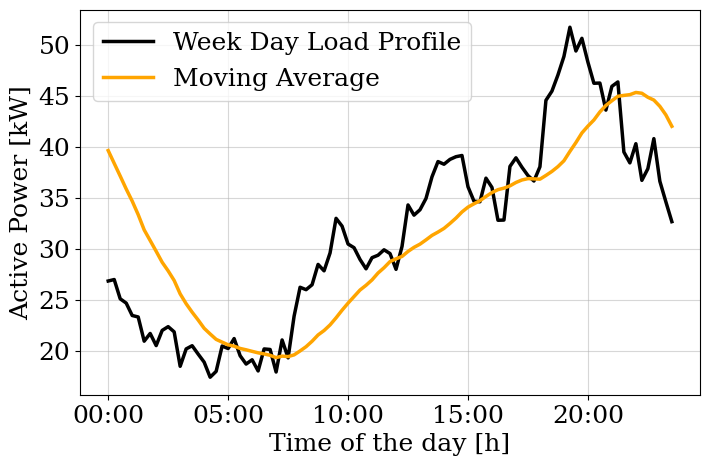

In [19]:
plt.rcParams.update({'font.size': 18})
df_cc_trafo = pd.concat([ler_cc_trafo(trafo)['DU'].reset_index(),L['MA']],axis=1)
df_cc_trafo['Hora'] = pd.date_range('00:00', freq='15min', periods=96).strftime('%H:%M')
df_cc_trafo = df_cc_trafo.set_index('Hora').iloc[:-1]
ax = df_cc_trafo.plot(figsize = (8,5),lw=2.5)
ax.grid(visible=True)
plt.grid(which='both',alpha=0.5,zorder=1)
ax.set_yticks([20,25,30,35,40,45,50])
ax.set_xlabel("Time of the day [h]", loc='center')
ax.set_ylabel("Active Power [kW]")

colors = ['black','orange']
for i, line in enumerate(ax.get_lines()):
    line.set_color(colors[i])

ax.legend(labels=['Week Day Load Profile', 'Moving Average'])
plt.savefig('{}/FIGURES/Fig5b.svg'.format(base_folder),bbox_inches='tight')
plt.show()

In [68]:
trafo = '2192042'
CT = 'UA-02'
cj = '14465'
Nuc = len(UCBT[UCBT.UNI_TR_MT == trafo])
Dref = dfinter[(dfinter.MVFeeder == CT) & (dfinter.VoltageLevel > 1000)].d.mean()
[P_mfr,E_mfr,L] = size_MFR(ler_cc_trafo(trafo),Dref,dt=0.25,pbase=1)
print('Dref = {:.2f} h, PMFR = {:.2f} kW, EMFR = {:.2f} kWh'.format(Dref,P_mfr,E_mfr))
print('Nuc = {}, E[kWh]/UC: {:.2f} kWh'.format(Nuc,E_mfr/Nuc))

NINT_MT = len(dfinter[(dfinter.MVFeeder == CT) & (dfinter.VoltageLevel > 1000)])/5
print('NINT_MT = {:.2f}'.format(NINT_MT))
ENE = np.mean([UCBT[UCBT.UNI_TR_MT == trafo]['ENE_{:02d}'.format(x)].sum() for x in range(1,13)])/Nuc
print('Consumo Medio Mensal/ UC = {:.2f} kWh'.format(ENE))
kVA_trafo = UNTRMT.loc[trafo].POT_NOM
print('Potencia do Transformador = {} kVA'.format(kVA_trafo))
comp_BT = SSDBT[SSDBT.UNI_TR_MT == trafo].COMP.sum()
print('Comprimento da rede de BT = {:.2f} m'.format(comp_BT))

TMDu = ATENDIMENTO[(ATENDIMENTO.IdeConjUndConsumidoras == cj) & (ATENDIMENTO.SigIndicador == 'TMD') & (ATENDIMENTO.AnoIndice == '2023')]['VlrIndiceEnviado'].mean()
TMPu = ATENDIMENTO[(ATENDIMENTO.IdeConjUndConsumidoras == cj) & (ATENDIMENTO.SigIndicador == 'TMP') & (ATENDIMENTO.AnoIndice == '2023')]['VlrIndiceEnviado'].mean()
TMEu = ATENDIMENTO[(ATENDIMENTO.IdeConjUndConsumidoras == cj) & (ATENDIMENTO.SigIndicador == 'TME') & (ATENDIMENTO.AnoIndice == '2023')]['VlrIndiceEnviado'].mean()
ARTEu = (TMDu + TMPu + TMEu)/60
[P_mfru,E_mfru,Lu] = size_MFR(ler_cc_trafo(trafo),ARTEu,dt=0.25,pbase=1)
print('ARTE = {:.2f} h, EMFR* = {:.2f} kWh'.format(ARTEu,E_mfru))

DEC = np.sum([UCBT[UCBT.UNI_TR_MT == trafo]['DIC_{:02d}'.format(x)].sum() for x in range(1,13)])/Nuc
FEC = np.sum([UCBT[UCBT.UNI_TR_MT == trafo]['FIC_{:02d}'.format(x)].sum() for x in range(1,13)])/Nuc
print('DEC = {:.2f}, FEC = {:.2f}'.format(DEC,FEC))

Dref = 5.07 h, PMFR = 3.51 kW, EMFR = 16.20 kWh
Nuc = 14, E[kWh]/UC: 1.16 kWh
NINT_MT = 41.00
Consumo Medio Mensal/ UC = 97.29 kWh
Potencia do Transformador = 75.0 kVA
Comprimento da rede de BT = 790.92 m
ARTE = 9.12 h, EMFR* = 27.05 kWh
DEC = 28.37, FEC = 14.07


<ipython-input-21-2dc091a70282>:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_cc_trafo['Hora'] = pd.date_range('00:00', freq='15T', periods=96).strftime('%H:%M')


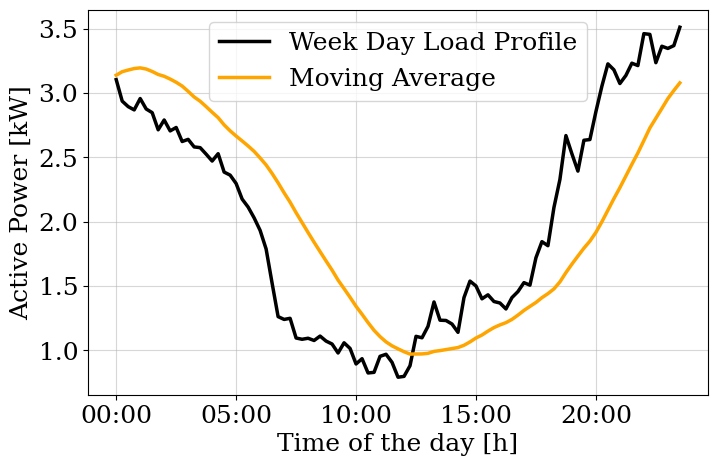

In [21]:
plt.rcParams.update({'font.size': 18})
df_cc_trafo = pd.concat([ler_cc_trafo(trafo)['DU'].reset_index(),L['MA']],axis=1)
df_cc_trafo['Hora'] = pd.date_range('00:00', freq='15T', periods=96).strftime('%H:%M')
df_cc_trafo = df_cc_trafo.set_index('Hora').iloc[:-1]
ax = df_cc_trafo.plot(figsize = (8,5),lw=2.5)
ax.grid(visible=True)
plt.grid(which='both',alpha=0.5,zorder=1)
ax.set_xlabel("Time of the day [h]", loc='center')
ax.set_ylabel("Active Power [kW]")

colors = ['black','orange']
for i, line in enumerate(ax.get_lines()):
    line.set_color(colors[i])

ax.legend(labels=['Week Day Load Profile', 'Moving Average'])
plt.savefig('{}/FIGURES/Fig6b.svg'.format(base_folder),bbox_inches='tight')
plt.show()

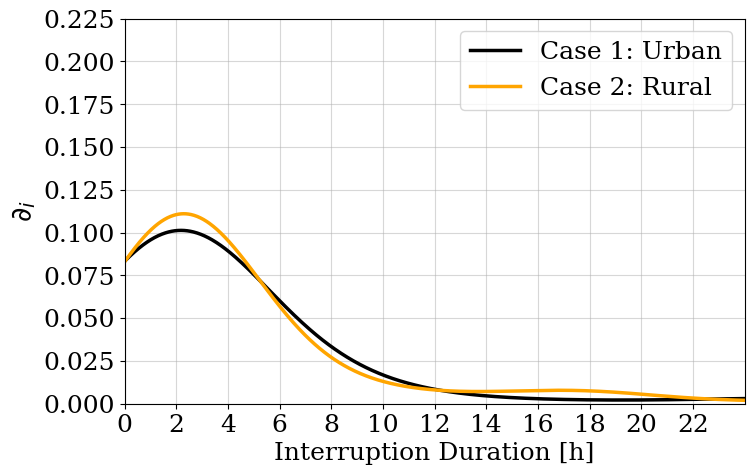

In [22]:
plt.rcParams.update({'font.size': 18})
trafo1 = '2574175'
trafo2 = '2192042'
CT1 = 'UO-02'
CT2 = 'UA-02'
#Duracao das interrupcoes
df1 = dfinter[(dfinter.MVFeeder == CT1) & (dfinter.VoltageLevel > 1000)].d
df2 = dfinter[(dfinter.MVFeeder == CT2) & (dfinter.VoltageLevel > 1000)].d
ax = pd.concat([df1,df2],axis=1).plot.kde(figsize = (8,5),bw_method='silverman',ind=np.linspace(0,24,1000),lw=2.5)
ax.set_xlabel('Interruption Duration [h]')
ax.set_ylabel('$∂_i$',size= 20)
plt.grid(which='both',alpha=0.5,zorder=1)
ax.grid(visible=True)
plt.grid(which='both',alpha=0.5,zorder=1)
ax.set_xticks(range(0,24,2))
ax.set_yticks(np.linspace(0,0.225,10))
ax.set_xlim(0,24)
ax.set_ylim(0,0.225)

colors = ['black','orange']
for i, line in enumerate(ax.get_lines()):
    line.set_color(colors[i])

ax.legend(labels=['Case 1: Urban', 'Case 2: Rural'])
plt.savefig('{}/FIGURES/Fig7a.svg'.format(base_folder),bbox_inches='tight')
plt.show()
#ax.set_title("Densidade de Probabilidade da Duração da Interrupção")

In [23]:
dfinter['hi'] = dfinter['TimeOfDay']*0.25

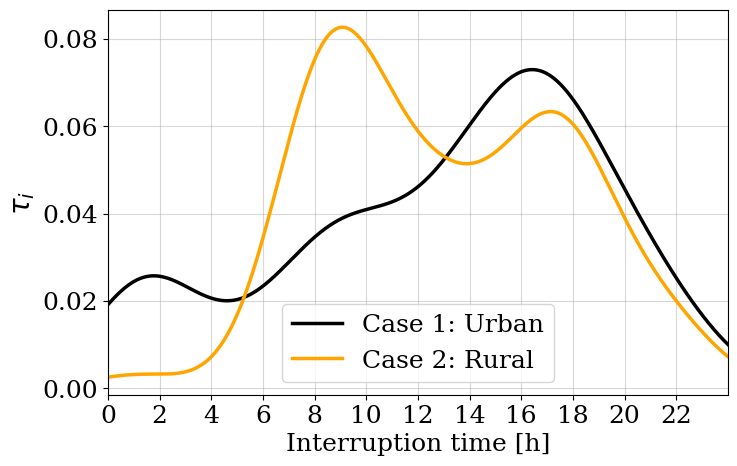

In [24]:
plt.rcParams.update({'font.size': 18})
trafo1 = '2574175'
trafo2 = '2192042'
CT1 = 'UO-02'
CT2 = 'UA-02'
#Horario das interrupcoes
df1 = dfinter[(dfinter.MVFeeder == CT1) & (dfinter.VoltageLevel > 1000)].hi
df2 = dfinter[(dfinter.MVFeeder == CT2) & (dfinter.VoltageLevel > 1000)].hi
ax = pd.concat([df1,df2],axis=1).plot.kde(figsize = (8,5),bw_method='silverman',ind=np.linspace(0,24,1000),lw=2.5)
ax.set_xlabel('Interruption time [h]')
ax.set_ylabel('$τ_i$',size= 20)
plt.grid(which='both',alpha=0.5,zorder=1)
ax.grid(visible=True)
ax.set_xticks(range(0,24,2))
ax.set_xlim(0,24)

colors = ['black','orange']
for i, line in enumerate(ax.get_lines()):
    line.set_color(colors[i])

ax.legend(labels=['Case 1: Urban', 'Case 2: Rural'])
plt.savefig('{}/FIGURES/Fig7b.svg'.format(base_folder),bbox_inches='tight')
plt.show()
#ax.set_title("Densidade de Probabilidade do Horário de Ocorrência da Interrupção")

In [25]:
def calc_kWh(P_t,d,h,dt=0.25):
  P_2t = np.concatenate((P_t, P_t))
  ti_index = int(h[0]/dt)
  tf_index = int((h[0]+d[0])/dt)
  E_kWh = P_2t[ti_index:tf_index].sum()*dt
  return E_kWh

In [26]:
from sklearn.neighbors import KernelDensity
r_seed = 48
n_amostras = 100000

trafo1 = '2574175'
trafo2 = '2192042'
CT1 = 'UO-02'
CT2 = 'UA-02'

##Duração
#Primeiro, determinar o NP array
Xd1 = np.array(dfinter[(dfinter.MVFeeder == CT1) & (dfinter.VoltageLevel > 1000)].d).reshape(-1, 1)
Xd2 = np.array(dfinter[(dfinter.MVFeeder == CT2) & (dfinter.VoltageLevel > 1000)].d).reshape(-1, 1)

#Agora, fazer a magica
kde1 = KernelDensity(kernel='gaussian', bandwidth='silverman').fit(Xd1)
kde2 = KernelDensity(kernel='gaussian', bandwidth='silverman').fit(Xd2)

#Extrair amostras
Yd1 = kde1.sample(n_samples=n_amostras, random_state=r_seed)
Yd2 = kde2.sample(n_samples=n_amostras, random_state=r_seed)

##Horário
#Primeiro, determinar o NP array
Xh1 = np.array(dfinter[(dfinter.MVFeeder == CT1) & (dfinter.VoltageLevel > 1000)].hi).reshape(-1, 1)
Xh2 = np.array(dfinter[(dfinter.MVFeeder == CT2) & (dfinter.VoltageLevel > 1000)].hi).reshape(-1, 1)

#Agora, fazer a magica
kde1 = KernelDensity(kernel='gaussian', bandwidth='silverman').fit(Xh1)
kde2 = KernelDensity(kernel='gaussian', bandwidth='silverman').fit(Xh2)

#Extrair amostras
Yh1 = kde1.sample(n_samples=n_amostras, random_state=r_seed)
Yh2 = kde2.sample(n_samples=n_amostras, random_state=r_seed)

Dref1 = dfinter[(dfinter.MVFeeder == CT1) & (dfinter.VoltageLevel > 1000)].d.mean()
[P_mfr1,E_mfr1,L1] = size_MFR(ler_cc_trafo(trafo1),Dref1,dt=0.25,pbase=1)
Dref2 = dfinter[(dfinter.MVFeeder == CT2) & (dfinter.VoltageLevel > 1000)].d.mean()
[P_mfr2,E_mfr2,L2] = size_MFR(ler_cc_trafo(trafo2),Dref2,dt=0.25,pbase=1)

#Curva de Carga
df_cc_trafo1 = pd.concat([ler_cc_trafo(trafo1)['DU'].reset_index(),L1['MA']],axis=1)
P_t1 = np.array(df_cc_trafo1['DU'])
df_cc_trafo2 = pd.concat([ler_cc_trafo(trafo2)['DU'].reset_index(),L2['MA']],axis=1)
P_t2 = np.array(df_cc_trafo2['DU'])

#Calcular a energia necessaria em cada interrupcao
E_kWh1 = [calc_kWh(P_t1,d,h,dt=0.25) for d,h in zip(Yd1,Yh1)]
E_kWh2 = [calc_kWh(P_t2,d,h,dt=0.25) for d,h in zip(Yd2,Yh2)]

#Calcular os percentis conjunto de valores obtidos
E_kWh_qu = pd.DataFrame(E_kWh1).quantile(np.linspace(0,0.99,100))
E_kWh_qu['E_kWh'] = E_kWh_qu
E_kWh_qu['E_rel_u'] = E_kWh_qu['E_kWh']/E_mfr1
E_kWh_qu = E_kWh_qu[['E_kWh','E_rel_u']]
E_kWh_qu.index = E_kWh_qu.index*100

E_kWh_qr = pd.DataFrame(E_kWh2).quantile(np.linspace(0,0.99,100))
E_kWh_qr['E_kWh'] = E_kWh_qr
E_kWh_qr['E_rel_r'] = E_kWh_qr['E_kWh']/E_mfr2
E_kWh_qr = E_kWh_qr[['E_kWh','E_rel_r']]
E_kWh_qr.index = E_kWh_qr.index*100

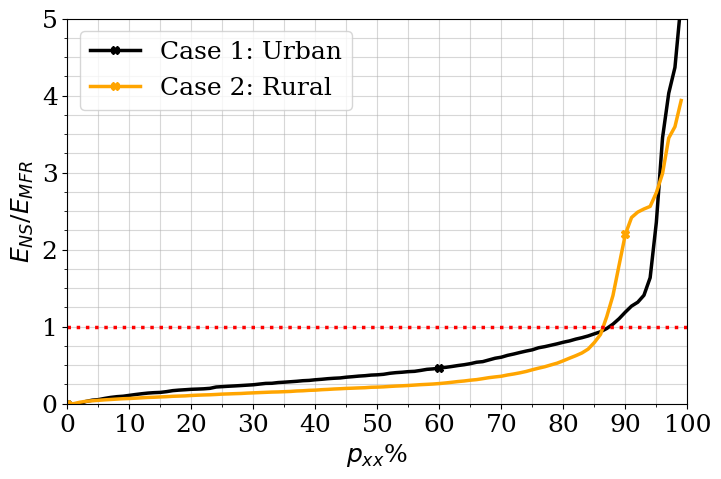

In [27]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
ax.set_xlim(0,100)
ax.set_ylim(0,5)
ax.set_xticks(np.linspace(0,100,11))
ax.set_xticks(np.linspace(0,100,21), minor = True)
ax.set_yticks(np.linspace(0,5,6))
ax.set_yticks(np.linspace(0,5,21), minor = True)
ax.set_ylabel('$E_{NS}$/$E_{MFR}$')
ax.set_xlabel('$p_{xx}$%')

pd.concat([E_kWh_qu['E_rel_u'],E_kWh_qr['E_rel_r']],axis=1).plot(ax=ax,figsize = (8,5),lw=2.5)
ax.grid(visible=True,which = 'both')
plt.grid(which='both',alpha=0.5,zorder=1)
markers = ["X", "X"]
spacing = [60,90]
colors = ['black','orange']
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
    line.set_markevery(spacing[i])
    line.set_color(colors[i])
ax.legend(labels=['Case 1: Urban', 'Case 2: Rural'])
plt.axhline(1, color='r',ls=':',lw=2.5)
plt.savefig('{}/FIGURES/Fig8.svg'.format(base_folder),bbox_inches='tight')
plt.show()

Dados das Tabelas

In [28]:
#Number of Sectionalizing Switches at LV level
UNSEBT.describe()

,TLCD,CONJ
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [29]:
#Length of secondary grids (m)
SSDBT.groupby('UNI_TR_MT')['COMP'].sum().describe()

,COMP
count,85611.00000
mean,343.10442
std,340.02782
min,0.00620
25%,93.58575
50%,228.74430
75%,488.77640
max,5158.18500


In [30]:
#Consumers per secondary grid - Rural
UCBT[UCBT.ARE_LOC == 'NU'].groupby('UNI_TR_MT').size().describe()

,0
count,139411.000000
mean,3.951037
std,10.512774
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,276.000000


In [31]:
#Consumers per secondary grid - Urban
UCBT[UCBT.ARE_LOC == 'UB'].groupby('UNI_TR_MT').size().describe()

,0
count,40267.000000
mean,58.072069
std,57.913687
min,1.000000
25%,11.000000
50%,44.000000
75%,86.000000
max,483.000000


In [32]:
#MV/LV Transformers rated power (kVA)
UNTRMT['POT_NOM'].describe()

,POT_NOM
count,178477.000000
mean,24.812687
std,33.160606
min,5.000000
25%,5.000000
50%,10.000000
75%,25.000000
max,300.000000


In [33]:
#Total load per secondary grid (kW)
UCBT.groupby('UNI_TR_MT')['CAR_INST'].sum().describe()

,CAR_INST
count,178477.000000
mean,7.019486
std,17.833295
min,0.000000
25%,0.170200
50%,0.442700
75%,2.468900
max,1497.938000


In [34]:
#MV circuit topology
total =UNTRMT.groupby('CONF').count()['SIT_ATIV'].sum()
UNTRMT.groupby('CONF').count()['SIT_ATIV']/total*100

,SIT_ATIV
CONF,
AN,100.0


In [35]:
#MV/LV transformer connection
total = UNTRMT.groupby('TIP_TRAFO').count()['SIT_ATIV'].sum()
UNTRMT.groupby('TIP_TRAFO').count()['SIT_ATIV']/total*100

,SIT_ATIV
TIP_TRAFO,
M,70.856749
MT,3.215540
T,25.927711


In [36]:
#Circuit single-wire earth return
total = UNTRMT.groupby('MRT').count()['SIT_ATIV'].sum()
UNTRMT.groupby('MRT').count()['SIT_ATIV']/total*100

,SIT_ATIV
MRT,
0,29.143251
1,70.856749


In [37]:
TMAE.describe()

,VlrIndiceEnviado
count,159.000000
mean,10.453791
std,2.877739
min,6.504875
25%,8.403600
50%,9.890521
75%,11.696961
max,26.162743


Ultimas Figuras

In [38]:
df_E = pd.DataFrame(columns=['alim','trafo','P_t','E_kWh'])

dfs_to_concat = []
for arqv in os.listdir(folderE_kWh):
    # Append each DataFrame to the list
    dfs_to_concat.append(pd.read_parquet('{}/{}'.format(folderE_kWh,arqv)))

# Concatenate all DataFrames in the list into a single DataFrame
df_E = pd.concat(dfs_to_concat, ignore_index=True)

In [39]:
perc_e = [np.quantile(x, [0.25, 0.50, 0.75, 0.90]) for x in df_E['E_kWh']]
df_E = pd.concat([df_E,pd.DataFrame(perc_e, columns=['p25', 'p50', 'p75', 'p90'])],axis=1)
df_E = df_E.set_index('trafo').join(UNTRMT.geometry).reset_index()
df_E = df_E[df_E['P_t'] != 0]
df_E = df_E.merge(UCBT[['DAT_CON','UNI_TR_MT']].groupby(['UNI_TR_MT']).count().reset_index().rename(columns={"DAT_CON": "NCONS","UNI_TR_MT": "trafo"}), on='trafo')
dfg_E = df_E[df_E['NCONS'] != 0]
df_E['E_per_UC'] = df_E['E_kWh']/df_E['NCONS']

del dfs_to_concat
gc.collect()

31204

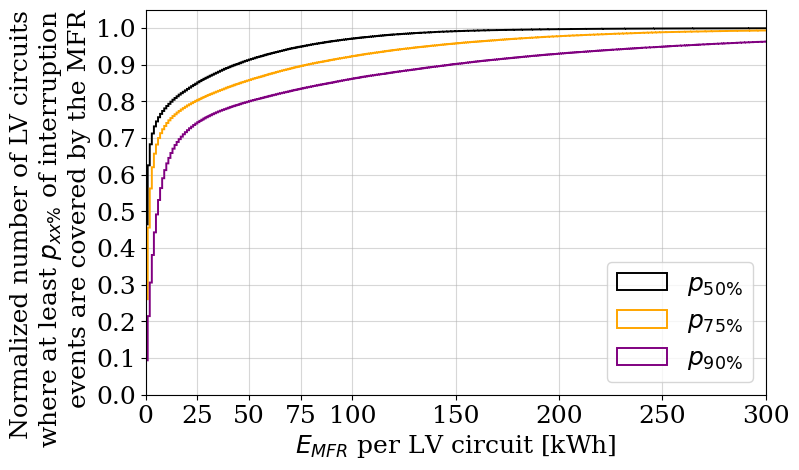

In [40]:
plt.rcParams.update({'font.size': 18})
df_E_tot = pd.concat([df_E.p50,df_E.p75,df_E.p90],axis=1)
ax = df_E_tot.plot.hist(density=True,cumulative=True,bins=1000,range=(0,1000),histtype='step',color=["black","orange","purple"],lw=1.4,figsize = (8,5))
#ax = dfg_E_tot.plot(figsize = (3.2,1.8))
ax.grid(visible=True)
plt.grid(which='both',alpha=0.5,zorder=1)
ax.set_xlabel("$E_{MFR}$ per LV circuit [kWh]", loc='center')
ax.set_ylabel("Normalized number of LV circuits\nwhere at least $p_{xx\%}$ of interruption\nevents are covered by the MFR", loc='top')
ax.set_xticks([0,25,50,75,100,150,200,250,300])
ax.set_xlim(0,300)
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.legend(labels=['$p_{50\%}$', '$p_{75\%}$', '$p_{90\%}$'],loc = 'lower right')
plt.savefig('{}/FIGURES/Fig9a.svg'.format(base_folder),bbox_inches='tight')
plt.show()

In [41]:
perc_e = [np.quantile(x, [0.25, 0.50, 0.75, 0.90]) for x in df_E['E_per_UC']]
df_E = pd.concat([df_E,pd.DataFrame(perc_e, columns=['p25_UC', 'p50_UC', 'p75_UC', 'p90_UC'])],axis=1)

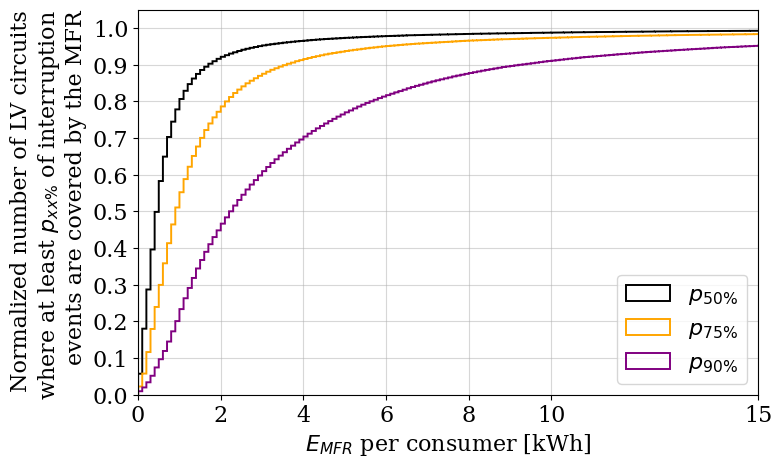

In [42]:
plt.rcParams.update({'font.size': 16})
df_E_tot = pd.concat([df_E.p50_UC,df_E.p75_UC,df_E.p90_UC],axis=1)
ax = df_E_tot.plot.hist(density=True,cumulative=True,bins=1000,range=(0,100),histtype='step',color=["black","orange","purple"],lw=1.4,figsize = (8,5))
#ax = dfg_E_tot.plot(figsize = (3.2,1.8))
ax.grid(visible=True)
plt.grid(which='both',alpha=0.5,zorder=1)
ax.set_xlabel("$E_{MFR}$ per consumer [kWh]", loc='center')
ax.set_ylabel("Normalized number of LV circuits\nwhere at least $p_{xx\%}$ of interruption\nevents are covered by the MFR", loc='top')
ax.set_xticks([0,2,4,6,8,10,15])
ax.set_xlim(0,15)
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.legend(labels=['$p_{50\%}$', '$p_{75\%}$', '$p_{90\%}$'],loc = 'lower right')
plt.savefig('{}/FIGURES/Fig9b.svg'.format(base_folder),bbox_inches='tight')
plt.show()